In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('student-intervention.csv')

In [3]:
df.head()

,sex,failures,paid,activities,absences,G1,G2,G3
0,F,0,no,no,4,5,5,6
1,F,3,yes,no,10,7,8,10
2,F,0,yes,yes,2,15,14,15
3,F,0,yes,no,4,6,10,10
4,M,0,yes,yes,10,15,15,15


In [4]:
sex = pd.get_dummies(df['sex'],drop_first=True)
df = df.drop('sex',axis=1)
df = pd.concat([df,sex],axis=1)

In [5]:
course = pd.get_dummies(df['paid'],drop_first=True)

df = df.drop('paid',axis=1)
df = pd.concat([df,course],axis=1)

df.rename(columns={'yes':'course'},inplace=True)

In [6]:
internships = pd.get_dummies(df['activities'],drop_first=True)

df = df.drop('activities',axis=1)
df = pd.concat([df,internships],axis=1)

df.rename(columns={'yes':'internships'}, 
                 inplace=True)

In [7]:
df['G1'] = df['G1'] * 5
df['G2'] = df['G2'] * 5
df['G3'] = df['G3'] * 5
df['G']= (df['G1']+df['G2']+df['G3']) // 3
df.head()

,failures,absences,G1,G2,G3,M,course,internships,G
0,0,4,25,25,30,0,0,0,26
1,3,10,35,40,50,0,1,0,41
2,0,2,75,70,75,0,1,1,73
3,0,4,30,50,50,0,1,0,43
4,0,10,75,75,75,1,1,1,75


In [8]:
df = df.drop(['G1','G2','G3'],axis=1)

In [9]:
df = df.drop(['course'],axis=1)
df.head()

,failures,absences,M,internships,G
0,0,4,0,0,26
1,3,10,0,0,41
2,0,2,0,1,73
3,0,4,0,0,43
4,0,10,1,1,75


In [10]:
ytest = pd.read_csv('student-results.csv')

In [11]:
df['passed']=ytest
df.head()

,failures,absences,M,internships,G,passed
0,0,4,0,0,26,0
1,3,10,0,0,41,1
2,0,2,0,1,73,1
3,0,4,0,0,43,1
4,0,10,1,1,75,1


In [12]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline

In [13]:
df.describe()

,failures,absences,M,internships,G,passed
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,0.335025,5.708122,0.474619,0.510152,53.111675,0.672589
std,0.744405,8.013258,0.499990,0.500533,18.469636,0.469865
min,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000
50%,0.000000,4.000000,0.000000,1.000000,53.000000,1.000000
75%,0.000000,8.000000,1.000000,1.000000,66.000000,1.000000
max,3.000000,75.000000,1.000000,1.000000,96.000000,1.000000


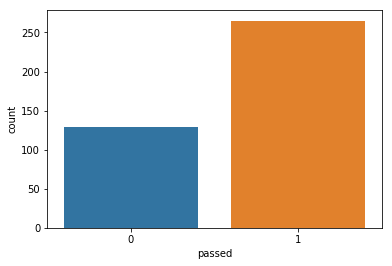

In [14]:
sns.countplot(df['passed'], label = "Count") 

C:\Users\Home\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


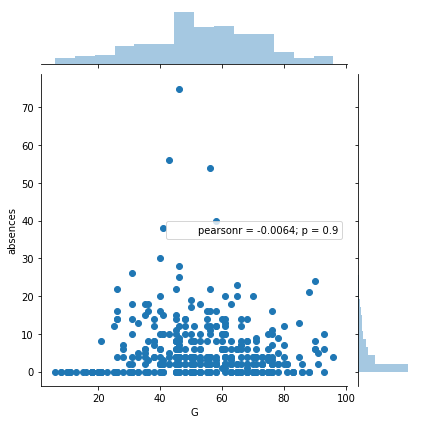

In [15]:
sns.jointplot(x='G',y='absences',data=df,kind='scatter')

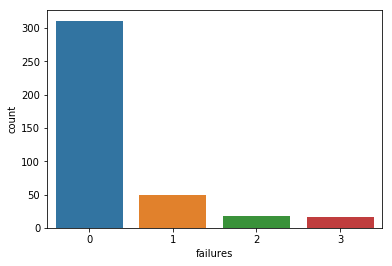

In [16]:
# students failures
sns.countplot(x = 'failures', data = df)

In [17]:
df_male = df[ df['M']==1]
df_female = df[ df['M']== 0 ]
df_pass = df[ df['passed'] == 1]
df_fail = df[ df['passed'] == 0]

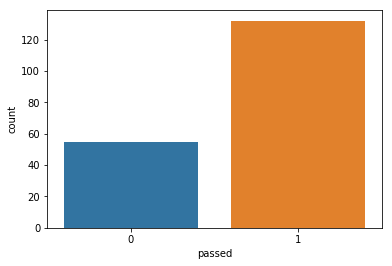

In [18]:
sns.countplot(df_male['passed'], label = "Count")

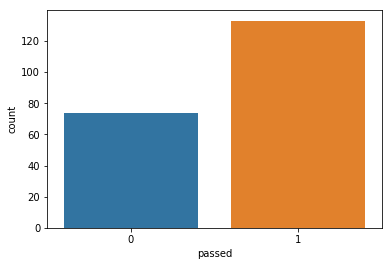

In [19]:
sns.countplot(df_female['passed'], label = "Count")

In [20]:
print(df_pass[ df_pass['internships'] == 1].count().M)
print(df_fail[ df_fail['internships'] == 1].count().M)
print(df_fail.count().M)
print(df_pass.count().M)

136
65
129
265


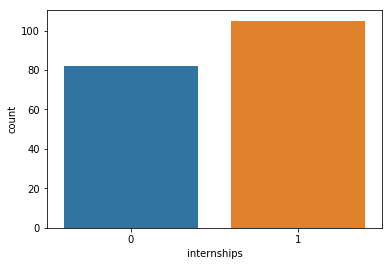

In [21]:
sns.countplot(df_male['internships'], label = "Count")

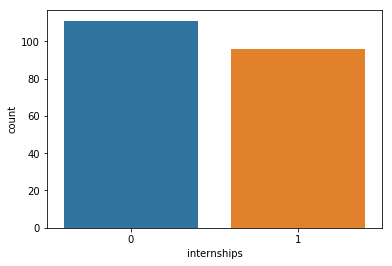

In [22]:
sns.countplot(df_female['internships'], label = "Count")

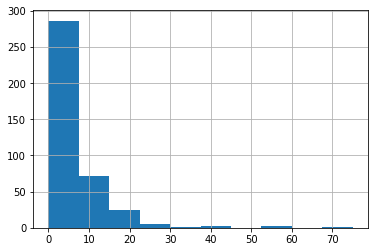

In [23]:
df['absences'].hist(bins = 10)

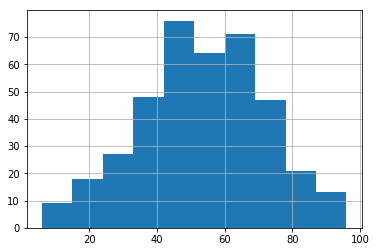

In [24]:
df['G'].hist(bins = 10)

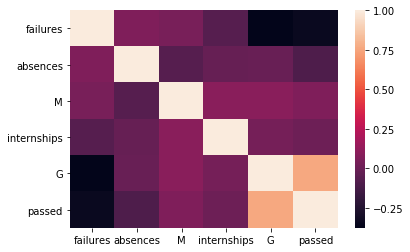

In [25]:
sns.heatmap(df.corr())

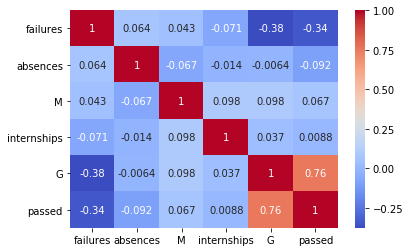

In [26]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

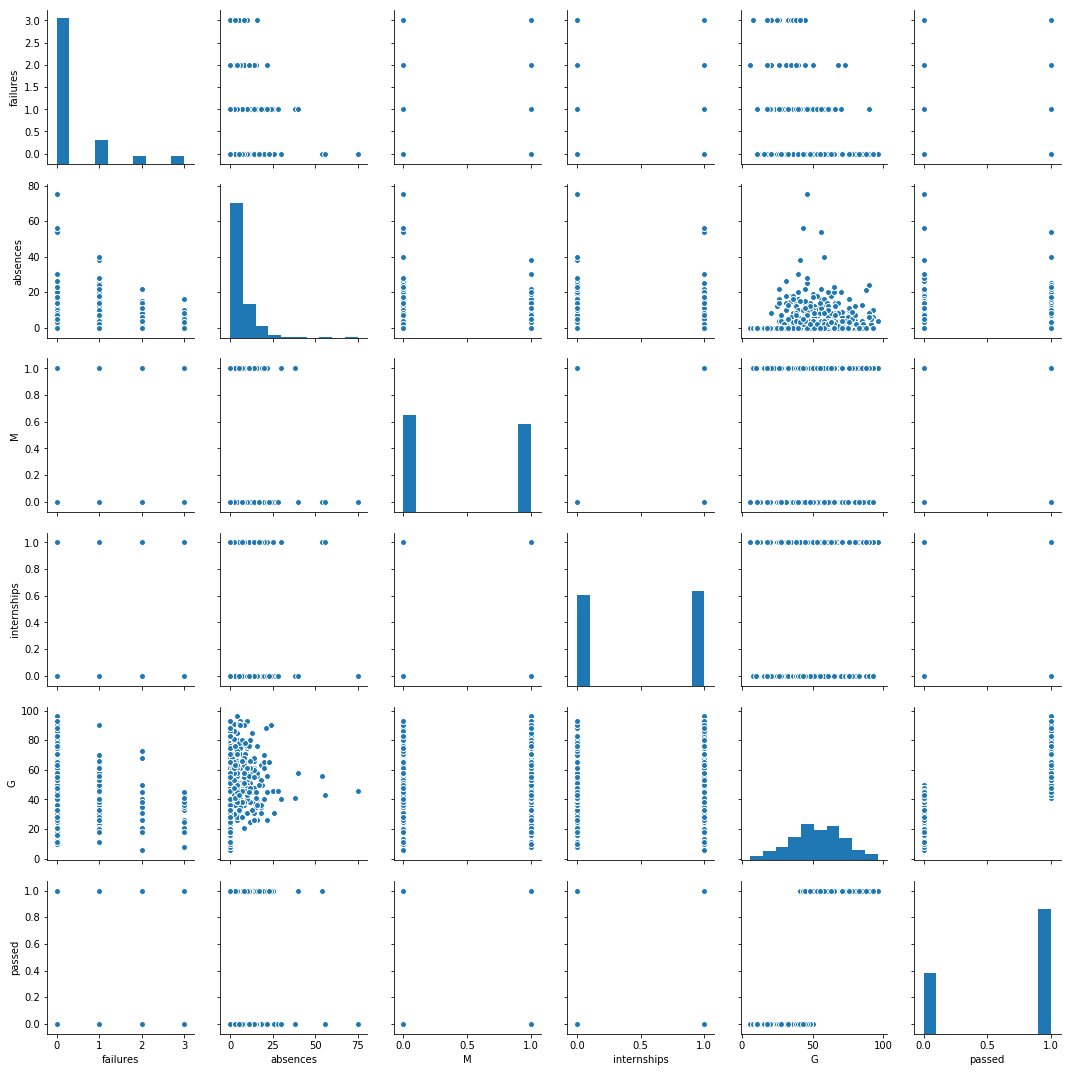

In [27]:
sns.pairplot(df)

In [28]:
n_students = df.shape[0]
n_features = df.shape[1] - 1 # the target column is not a feature column
n_passed = df[df['passed']==1].shape[0]
n_failed = df[df['passed']==0].shape[0]

t = "total " + str(n_students)
print(t)
s= "passed " + str(n_passed)
print(s)
p = "failed " + str(n_failed)
print(p)

total 394
passed 265
failed 129


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = df.drop('passed',axis=1)
y = df['passed']


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [64]:
X_test

,failures,absences,M,internships,G
38,0,8,0,1,66
283,0,4,0,0,50
162,0,2,1,0,50
218,0,4,0,1,48
161,1,0,1,1,11
198,0,0,0,0,46
53,0,6,0,0,60
225,0,10,0,1,76
255,0,6,0,1,65
56,0,4,1,1,73


In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC()

In [35]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
predictions = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.76      0.84        25
          1       0.90      0.98      0.94        54

avg / total       0.91      0.91      0.91        79



In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rfc_pred = rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test,rfc_pred))

[[22  3]
 [ 2 52]]


In [42]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.92      0.88      0.90        25
          1       0.95      0.96      0.95        54

avg / total       0.94      0.94      0.94        79



In [43]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [44]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9240506329113924


In [45]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[19  6]
 [ 0 54]]


             precision    recall  f1-score   support

          0       1.00      0.76      0.86        25
          1       0.90      1.00      0.95        54

avg / total       0.93      0.92      0.92        79



In [46]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
y_pred = classifier.predict(X_test)
y_pred

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[22  3]
 [ 2 52]]
             precision    recall  f1-score   support

          0       0.92      0.88      0.90        25
          1       0.95      0.96      0.95        54

avg / total       0.94      0.94      0.94        79



In [49]:
data = pd.DataFrame(columns=['Marks', 'absences'])
data['Marks'] = df['G']
data['absences'] = df['absences']
data.head()

,Marks,absences
0,26,4
1,41,10
2,73,2
3,43,4
4,75,10


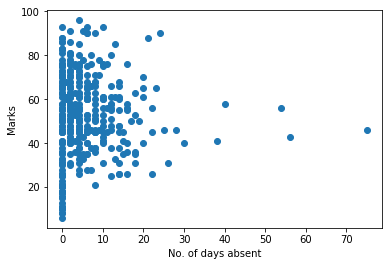

In [50]:
plt.scatter(data['absences'],data['Marks'])
plt.xlabel('No. of days absent')
plt.ylabel('Marks')
plt.show()

In [51]:
x=data.copy()

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters=4)

In [54]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
kmeans.cluster_centers_

array([[73.73015873,  4.15873016],
       [26.71604938,  4.48148148],
       [47.14285714, 45.85714286],
       [50.78888889,  5.78333333]])

In [56]:
kmeans.labels_

array([1, 3, 0, 3, 0, 3, 1, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 1, 3, 0, 0, 0,
       0, 3, 1, 3, 0, 3, 3, 3, 0, 0, 3, 0, 1, 0, 0, 3, 0, 3, 3, 0, 3, 3,
       1, 3, 0, 0, 1, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0,
       1, 3, 0, 0, 3, 1, 0, 2, 3, 3, 3, 3, 1, 3, 3, 1, 0, 3, 3, 1, 0, 3,
       1, 1, 0, 1, 3, 0, 3, 0, 3, 0, 3, 1, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 3, 3, 1, 0, 1, 1, 3,
       3, 1, 1, 1, 1, 0, 0, 1, 3, 3, 0, 1, 3, 1, 3, 1, 3, 1, 0, 3, 1, 3,
       3, 0, 3, 0, 3, 1, 1, 1, 3, 1, 3, 3, 0, 1, 0, 1, 0, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 0, 0, 0, 3, 0,
       3, 0, 3, 3, 1, 3, 2, 1, 3, 3, 1, 3, 3, 0, 1, 3, 0, 1, 1, 1, 3, 1,
       1, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 1, 3, 0, 3, 3, 1, 3, 3, 1,
       3, 1, 0, 3, 1, 1, 0, 1, 3, 1, 3, 3, 3, 0, 3, 0, 1, 0, 3, 3, 3, 1,
       0, 3, 3, 3, 1, 3, 0, 3, 0, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0,
       3, 0, 0, 3, 0, 3, 0, 0, 3, 1, 3, 0, 0, 3, 3,

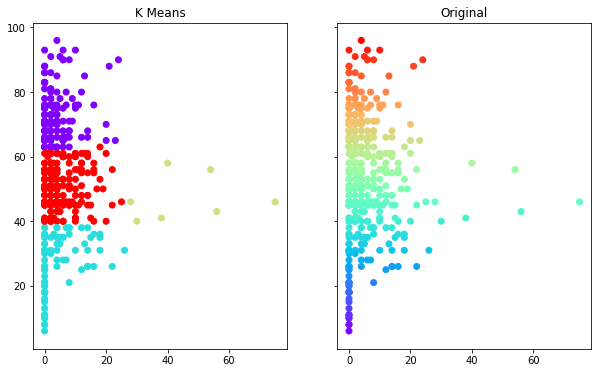

In [57]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data['absences'],data['Marks'],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data['absences'],data['Marks'],c=data['Marks'],cmap='rainbow')

In [58]:
import pickle

In [59]:
pickle.dump(classifier, open('model.pkl','wb'))

In [70]:
dtest = pd.DataFrame([[0,4,0,1,12]], columns = ['failures','absences','M','internships','G']) 
dtest

,failures,absences,M,internships,G
0,0,4,0,1,12


In [71]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict(dtest))

[0]


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
